In [1]:
import os
from pathlib import Path

from ansys.heart.misc.downloader import download_case, unpack_case
import ansys.heart.preprocessor.models as models



os.environ["USE_OLD_HEART_MODELS"] = "1"

__file__ = r"c:\Users\xuhu\pyheart-lib\examples\preprocessor\doc_ECG_coordinates,py"

case_file = str(
    Path(Path(__file__).resolve().parents[2], "downloads", "Strocchi2020", "01", "01.case")
)
download_folder = str(Path(Path(__file__).resolve().parents[2], "downloads"))
workdir = str(
    Path(Path(__file__).resolve().parents[2], "downloads", "Strocchi2020", "01", "Biv")
)
path_to_model = str(Path(workdir, "heart_model.pickle"))

###############################################################################
# Download the case
# ~~~~~~~~~~~~~~~~~
# Download and unpack the case from the public repository of full hearts if it is
# not yet available. This model will be used as input for the preprocessor.
if not os.path.isfile(case_file):
    path_to_downloaded_file = download_case(
        "Strocchi2020", 1, download_folder=download_folder, overwrite=False
    )
    unpack_case(path_to_downloaded_file)

###############################################################################
# Set required information
# ~~~~~~~~~~~~~~~~~~~~~~~~
# Set the right database to which this case belongs, and set other relevant
# information such as the desired mesh size.
info = models.ModelInfo(
    database="Strocchi2020",
    path_to_case=case_file,
    work_directory=workdir,
    path_to_model=path_to_model,
    add_blood_pool=False,
    mesh_size=1.5,
)

In [2]:

# create the working directory
info.create_workdir()
# clean the working directory
info.clean_workdir(extensions_to_remove=[".stl", ".vtk", ".msh.h5"])
# dump information to stdout
info.dump_info()

In [3]:
# Initialize the heart model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~
# Initialize the desired heart model, and invoke the main method to
# extract the simulation mesh and dump the model to disk. This will extract
# the relevant parts from the original model and remesh the entire surface and
# volume. Moreover, relevant anatomical features are extracted.

# instantiate a four chamber model
model = models.BiVentricle(info)

# extract the simulation mesh
model.extract_simulation_mesh()

# dump the model to disk for future use
model.dump_model(path_to_model)
# print the resulting information
model.print_info()

# print part names
print(model.part_names)

2023/09/29 16:05:46 - DEBUG - Establishing tetra-face connectivity...
2023/09/29 16:06:16 - DEBUG - Time elapsed: 29.7 s
2023/09/29 16:06:16 - DEBUG - Skipping interface pair: Left ventricle myocardium | Right ventricle myocardium
2023/09/29 16:06:17 - DEBUG - Extracting : ['epicardium', 'endocardium', 'septum'] from left-ventricle-myocardium
2023/09/29 16:06:18 - DEBUG - Extracting : ['epicardium', 'endocardium'] from right-ventricle-myocardium
2023/09/29 16:06:20 - INFO - Remeshing volume...
2023/09/29 16:06:21 - DEBUG - Starting meshing in directory: C:\Users\xuhu\pyheart-lib\downloads\Strocchi2020\01\Biv\meshing



Importing one geom object per program-controlled and one zone per body ...
    C:\\Program Files\\ANSYS Inc\\v222\\commonfiles\\CPython\\3_7\\winx64\\Release\\python\\..\\Ansys\\TGrid\\CADReaders.py started by xuhu on LYOTRAINEE14 winx64 on Fri Sep 29 16:06:47 2023
    using Python 3.7.13 (remotes/origin/bdighole/python/3713/clean_up-dirty:d4e1bece, Apr  6 2022, 00:24:) [MSC v.1920 64 bit (AMD64)]
    
    using Ansys.Meshing.FieldMesher build May 27 2022 08:47:51
    
    running ANSYS TGrid CADToTGridConverter ...
    setting up parameters ...
    setting up parameters done.
    running conversion ...
    converting 9 file(s) from Workbench to FLTG using output path 'C:\\Users\\xuhu\\AppData\\Local\\Temp/out169599640641000.tgf'
    converting file 'part_left-ventricle-endocardium.stl' (1 of 9) from Workbench to FLTG using output path 'C:\\Users\\xuhu\\AppData\\Local\\Temp'
    importing data ...
    importing meshing model in STL format from file 'C:\\Users\\xuhu\\pyheart-lib\\downl

2023/09/29 16:07:36 - DEBUG - Excluding 4 array names
2023/09/29 16:07:36 - DEBUG - Removing cell data...uvc_intraventricular
2023/09/29 16:07:36 - DEBUG - Removing cell data...uvc_longitudinal
2023/09/29 16:07:36 - DEBUG - Removing cell data...uvc_rotational
2023/09/29 16:07:36 - DEBUG - Removing cell data...uvc_transmural
2023/09/29 16:07:36 - WARNING - Normalization of vectors is buggy and turned off
2023/09/29 16:07:36 - WARNING - Removed returning cell / point data
2023/09/29 16:07:41 - DEBUG - Excluding 5 array names
2023/09/29 16:07:41 - DEBUG - Removing cell data...electrode_endo_rv
2023/09/29 16:07:41 - DEBUG - Removing cell data...uvc_intraventricular
2023/09/29 16:07:41 - DEBUG - Removing cell data...uvc_longitudinal
2023/09/29 16:07:41 - DEBUG - Removing cell data...uvc_rotational
2023/09/29 16:07:41 - DEBUG - Removing cell data...uvc_transmural
2023/09/29 16:07:41 - DEBUG - Removing point data...fiber
2023/09/29 16:07:41 - DEBUG - Removing point data...sheet
2023/09/29 16:

['Left ventricle', 'Right ventricle', 'Septum']


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


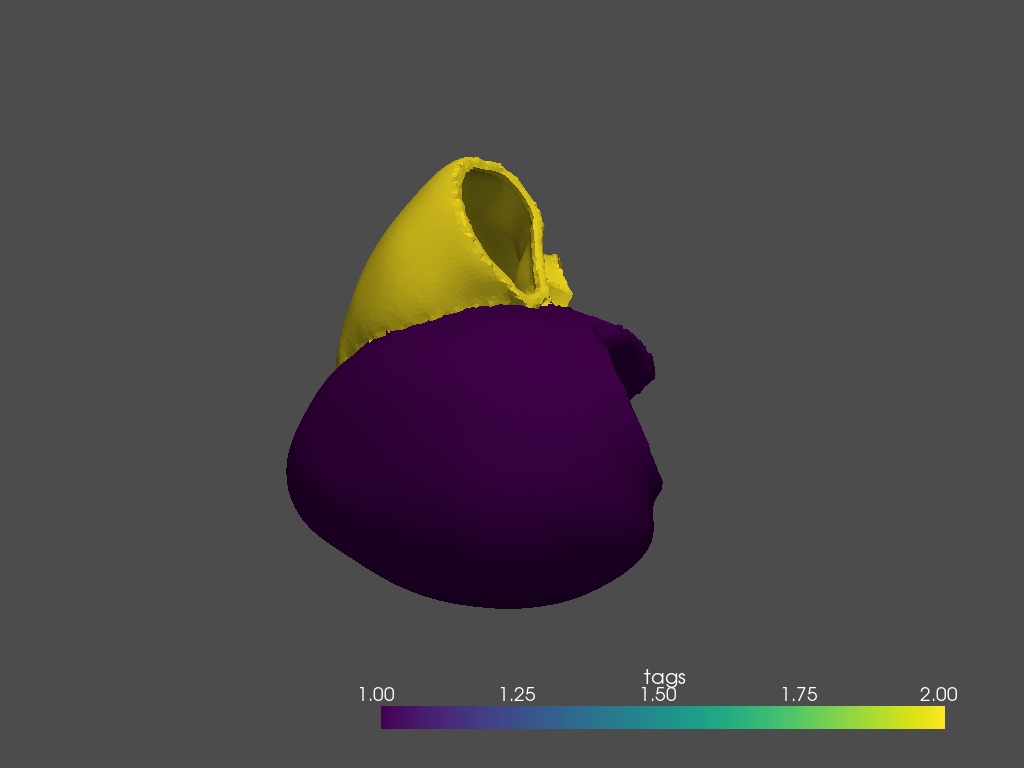

In [4]:
# plot the remeshed model
model.plot_mesh(show_edges=False)


In [12]:
model.mesh.tetrahedrons[model.left_ventricle.element_ids,:]

array([[ 39326,  12279,  12208,  77398],
       [ 87966,  61770,  78115,  87965],
       [ 97573,  65693,  81762,  42976],
       ...,
       [ 52552,  41638,  17134, 113263],
       [ 52552,  17134,  17105, 113263],
       [ 74485,  52552,  17105, 113263]], dtype=int64)

In [11]:
import pyvista
import numpy as np

file_path = "C:/Users/xuhu/pyvista_test/2019_Lopez_torsoPAP_tetraVol-Labeled/torsoPAP_tetraVol-Labeled_ORIGINAL_full.vtk"
torso = pyvista.read(file_path)

Organids_array = torso["OrganID"]
organ_id_to_plot = 7
# ribs = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")
heart = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")

electrode_positions = np.array([
    [x, y, z] for x, y, z in [
        [91.69106809237354, 167.4055272828183, 251.0416838617331],  # V1
        [114.07772933063883, 123.13918227704727, 291.5674747053013],  # V2
        [97.01364431022192, 109.7927312489943, 317.44575378942824],  # V3
        [81.88880486815538, 71.3859176743268, 349.4243690358569],  # V4
        [98.99550734014053, 15.879947224122954, 348.26233938958114],  # V5
        [106.23537044908527, -44.085603837273695, 329.16199248487465],  # V6
        [170.75567690191764, 234.51300755277248, 77.85629801985534],  # RA
        [262.9539413249434, -2.9189733795951724, 261.5745131716608],  # LA
        [-134.9640236606803, 197.05542132895272, 257.6409644703581],  # RL
        [-70.4506948627224, 22.20437217827933, 400.2792599184596]  # LL
    ]
])

In [ ]:
plotter = pyvista.Plotter()

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)

plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()

## examples

In [6]:
from vtkmodules.vtkCommonDataModel import vtkIterativeClosestPointTransform

mesh_a = model.mesh
mesh_b = heart

icp = vtkIterativeClosestPointTransform()
icp.SetSource(mesh_a)
icp.SetTarget(mesh_b)
icp.GetLandmarkTransform().SetModeToRigidBody()
icp.SetMaximumNumberOfLandmarks(100)
icp.SetMaximumMeanDistance(.00001)
icp.SetMaximumNumberOfIterations(500)
icp.CheckMeanDistanceOn()
icp.StartByMatchingCentroidsOn()
icp.Update()

aligned = mesh_a.transform(icp.GetMatrix())


In [13]:
from vtkmodules.vtkCommonDataModel import vtkIterativeClosestPointTransform

mesh_a = model.mesh
mesh_b = heart

icp = vtkIterativeClosestPointTransform()
icp.SetSource(mesh_a)
icp.SetTarget(mesh_b)
icp.GetLandmarkTransform().SetModeToRigidBody()
icp.SetMaximumNumberOfLandmarks(10000)
icp.SetMaximumMeanDistance(.00001)
icp.SetMaximumNumberOfIterations(5000)
icp.CheckMeanDistanceOn()
icp.StartByMatchingCentroidsOn()
icp.Update()

aligned = mesh_a.transform(icp.GetMatrix())


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


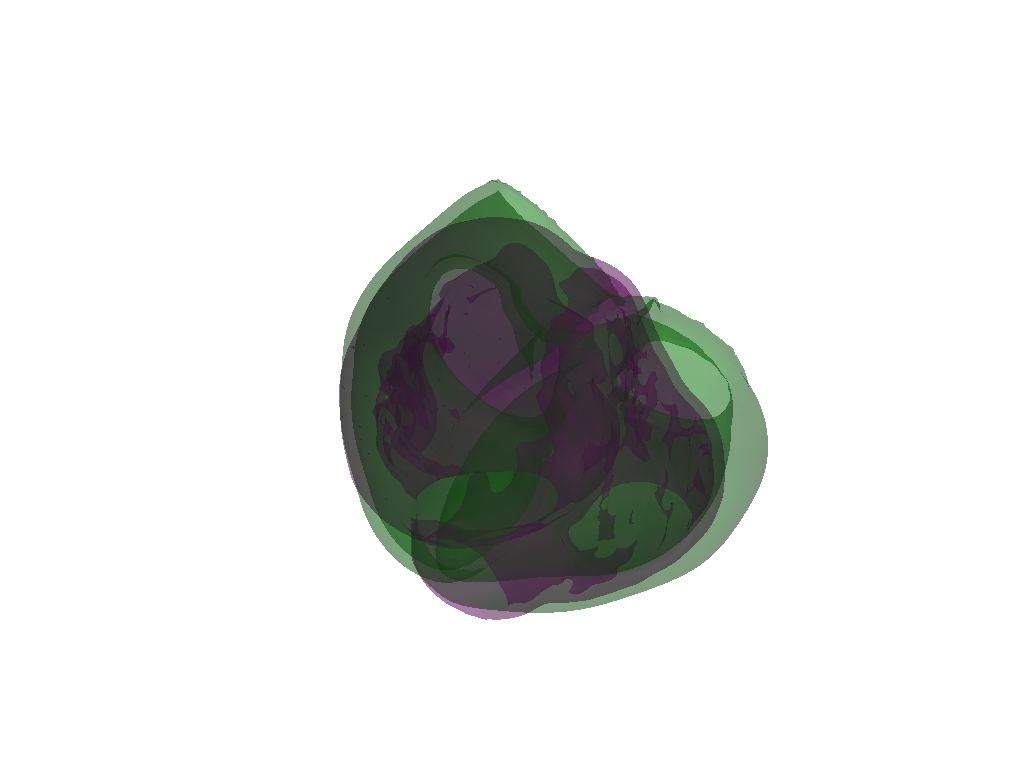

In [15]:
p2 = pyvista.Plotter()

# Visualize the original moving model and the transformed model
# p2.add_mesh(model.mesh, color="green", opacity=0.1)
p2.add_mesh(mesh_b, color="purple", opacity=0.3)
p2.add_mesh(aligned, color="green", opacity=0.3)

# Set the background color and show the plotter
p2.background_color = "white"
p2.show()